# Give me some Credit 


Use CRISP-DM to answer some issues related to GiveMe some credit Kaggle competition

### Environment Setup

In [2]:
import numpy as np               # Array, Vector, matrix calculations
import pandas as pd              # DataFrame handling
import matplotlib.pyplot as plt  # Plotting
pd.options.display.max_columns = 999

%matploblib inline
np.random.seed(42)               # Answer to everything

UsageError: Line magic function `%matploblib` not found.


## 1. Download, Explore and prepare Kaggle competition dataset

Give me some credit dataset:
    https://www.kaggle.com/c/GiveMeSomeCredit/data
    
The Give Me Some credit dataset contains 12 variables related to the financial behaviour and position of customers, these are:

- **SeriousDlqin2yrs:** Person Experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit, divided by the sum of credit limits
- **Age:** Age borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times the borrower has been 30-59 days past due but not worse in the last 2 years
- **DebtRatio:** Monthly debt payments, alimony, living costs divided by monthly gross income
- **MonthlyIncome:** Monthly Income of customer
- **NumberOfOpenCreditLinesAndLoans:** Number of Open oans (installments like car loan or mortgage) and Lines of Credit
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but not worse in the last 2 years
- **NumberOfDependents:** Number of dependents in family excluding themselves.


These 10 input variables are used to predict the target variable wheter or not the customer will experience any Serious Delinquency event in the next two years. Since we will perform our analysis on a wide range of models, all of these variables will be handled and converted to numeric type.


### Import Data and clean

The credit card default data is available as an .xls file. Pandas reads .xls files automatically.

In [6]:
# Import file
path = 'D:/Python/Projects/02_GSC/cs-training.csv'
data = pd.read_csv(path,
                  usecols = ['SeriousDlqin2yrs',
                             'RevolvingUtilizationOfUnsecuredLines',
                             'age',
                             'NumberOfTime30-59DaysPastDueNotWorse',
                             'DebtRatio',
                             'MonthlyIncome',
                             'NumberOfOpenCreditLinesAndLoans',
                             'NumberOfTimes90DaysLate',
                             'NumberRealEstateLoansOrLines',
                             'NumberOfTime60-89DaysPastDueNotWorse',
                             'NumberOfDependents'])


In [5]:
data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

### EDA

Exploration of a dataset is paramount to a correct framing of our problem. Out objective is to predict an event of serious delinquency in the next 2 years based on 10 variables. In order to really understand our data and the vastness of the problem at hand we will focus on the next steps:

* Dimensions of the dataset
* Descriptive stats + Probability distribution plots
* Nan Detection
* Outlier Detection + Box plots
* Correlation Matrix
* Model Constraints from data related problems
* Possible candidates of features

Lets start with the Dimensions of our training matrix

In [6]:
data.shape

(150000, 11)

Thus we have 150.000 records to train our model, and 11 features to predict our target feature  SeriousDlqin2yrs

#### • Descriptive Stats

In [7]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## • Probability Distribution plots + Bins


### Target: SeriousDlqin2yrs

As you can probably tell, this dataset feature some imbalance on the response target, (Kudos to the risk evaluation team of the dataset). Delinquency events in the last 2 years have been around 6.7%

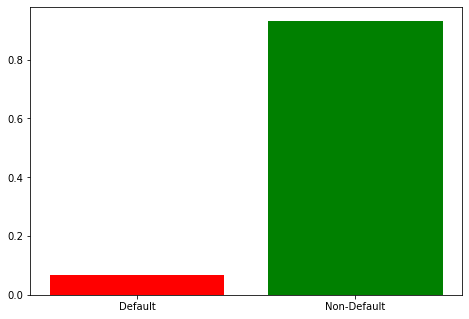

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Default', 'Non-Default']
values = [(data[data['SeriousDlqin2yrs']==1].sum()['SeriousDlqin2yrs'])/150000, (150000-data[data['SeriousDlqin2yrs']==1].sum()['SeriousDlqin2yrs'])/150000]
ax.bar(labels,values, color= ['red', 'green'])
plt.show()

### • RevolvingUtilizationOfUnsecuredLines:
In order to properly understand the distribution on our features, we will use the elements of a Box-Plot and its bounds. In this case we find almost 38k records between -0.74 and 0.2, negative utilization rates? this does seem a bit strange,  notice as well the concentration of  high rates of Revolving utilization: 135%!

In [10]:
# RevolvingUtilizationOfUnsecuredLines 
## Get quantiles and define Bins
col = 'RevolvingUtilizationOfUnsecuredLines'
def BinSelection(col): 
    q_u = data[col].quantile(0.75)  # Upper Quantile
    q_l = data[col].quantile(0.25)  # Lower Quantile
    m   = data[col].quantile(0.50)  # Median
    iqr = q_u - q_l                 # InterQuartile Range
    olb = q_l - 3 * iqr             # Outer Lower Bound, Anything less is strongly suspected outlier
    ilb = q_l - 1.5 * iqr           # Inner Lower Bound, Anything within bound is softly considered outlier
    iub = q_u + 1.5 * iqr           # Inner Upper Bound
    oub = q_u + 3 * iqr             # Outer Upper Bound
    df = [float('-inf'), olb, ilb, q_l, m, q_u, iub, oub, float('inf')] 
    return(df);

(0.154, 0.559]      37500
(0.0299, 0.154]     37500
(-0.764, 0.0299]    37500
(0.559, 1.353]      36737
(1.353, 2.147]        424
(2.147, inf]          339
(-1.558, -0.764]        0
(-inf, -1.558]          0
Name: RevolvingUtilizationOfUnsecuredLines_binned, dtype: int64
[-inf, -1.5576689744999999, -0.7639007662499999, 0.029867442, 0.154180737, 0.5590462475, 1.35281445575, 2.146582664, inf]


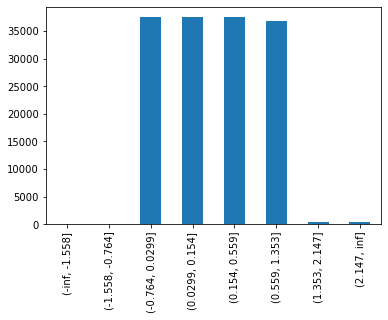

In [11]:
bp_bins = (BinSelection('RevolvingUtilizationOfUnsecuredLines'))
data['RevolvingUtilizationOfUnsecuredLines_binned']=pd.cut(x = data['RevolvingUtilizationOfUnsecuredLines'],
                        bins = bp_bins 
                        )
data['RevolvingUtilizationOfUnsecuredLines_binned'].value_counts(sort=False).plot.bar()
print(data['RevolvingUtilizationOfUnsecuredLines_binned'].value_counts())
print(bp_bins)

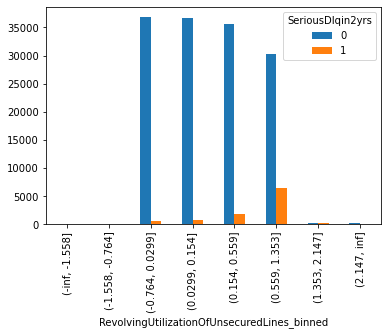

In [12]:
data.groupby(['RevolvingUtilizationOfUnsecuredLines_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What values worry me in this feature: 
- Negative numbers on utilization are not feasible
- Numbers greater than 1 seem troublesome from a financial point perspective.
- High Utilization of revolving products does suggest an increase on the target feature

Let us test for numbers greater than 1 since we know the min of this feature is 0 we need not to worry about negative numbers

In [13]:
# Numbers greater than 1 on dataset
test_data = data[data['RevolvingUtilizationOfUnsecuredLines']>1]
col_count = test_data.count()
print(col_count)

SeriousDlqin2yrs                               3321
RevolvingUtilizationOfUnsecuredLines           3321
age                                            3321
NumberOfTime30-59DaysPastDueNotWorse           3321
DebtRatio                                      3321
MonthlyIncome                                  2773
NumberOfOpenCreditLinesAndLoans                3321
NumberOfTimes90DaysLate                        3321
NumberRealEstateLoansOrLines                   3321
NumberOfTime60-89DaysPastDueNotWorse           3321
NumberOfDependents                             3260
RevolvingUtilizationOfUnsecuredLines_binned    3321
dtype: int64


### Age:
This feature seems like a straightforward one, Demographic age in years, we expect lower age to affect risk exposure.


In [14]:
data['age'].value_counts()

49     3837
48     3806
50     3753
63     3719
47     3719
       ... 
101       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

Although 90+ age seems a given on a developed world, being in a loan portfolio at advanced age does not seem that relevant. Bank policies usually avoid customers with life exposure. let us Bin this variable again and try to understand it  a little bit better.

(41.0, 52.0]    39151
(52.0, 63.0]    38379
(20.0, 41.0]    38218
(63.0, 80.0]    29315
(80.0, 93.0]     4781
(93.0, inf]       155
(18.0, 20.0]        0
(0.0, 18.0]         0
Name: age_binned, dtype: int64
[-inf, -25.0, 8.0, 41.0, 52.0, 63.0, 96.0, 129.0, inf]


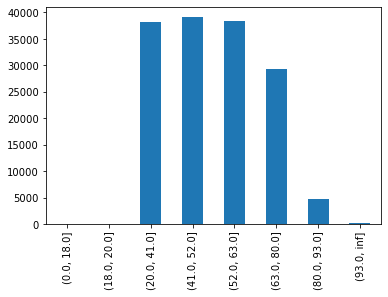

In [15]:
bp_bins = (BinSelection('age'))

data['age_binned']=pd.cut(x = data['age'],
                        bins = [0, 18, 20, 41, 52, 63, 80, 93, float('Inf')] 
                        )
data['age_binned'].value_counts(sort=False).plot.bar()
print(data['age_binned'].value_counts())
print(bp_bins)

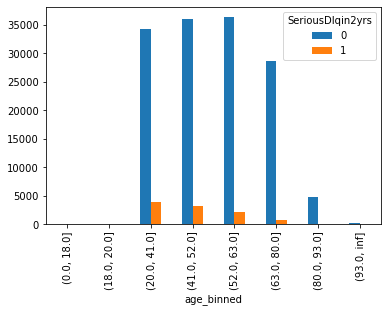

In [17]:
data.groupby(['age_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What worries me about this feature?:
- People Below legal age
- 90+ population
- Concentration of target events on first bin, suggests decrease in bin increases.

In [16]:
# Non Legal Age customers on dataset
test_data = data[data['age'] < 18]
col_count = test_data.count()
print(col_count)

SeriousDlqin2yrs                               1
RevolvingUtilizationOfUnsecuredLines           1
age                                            1
NumberOfTime30-59DaysPastDueNotWorse           1
DebtRatio                                      1
MonthlyIncome                                  1
NumberOfOpenCreditLinesAndLoans                1
NumberOfTimes90DaysLate                        1
NumberRealEstateLoansOrLines                   1
NumberOfTime60-89DaysPastDueNotWorse           1
NumberOfDependents                             1
RevolvingUtilizationOfUnsecuredLines_binned    1
age_binned                                     0
dtype: int64


In [18]:
# Non Legal Age customers on dataset
test_data = data[data['age'] > 90]
col_count = test_data.count()
print(col_count)

SeriousDlqin2yrs                               489
RevolvingUtilizationOfUnsecuredLines           489
age                                            489
NumberOfTime30-59DaysPastDueNotWorse           489
DebtRatio                                      489
MonthlyIncome                                  255
NumberOfOpenCreditLinesAndLoans                489
NumberOfTimes90DaysLate                        489
NumberRealEstateLoansOrLines                   489
NumberOfTime60-89DaysPastDueNotWorse           489
NumberOfDependents                             399
RevolvingUtilizationOfUnsecuredLines_binned    489
age_binned                                     489
dtype: int64


### NumberOfTime30-59DaysPastDueNotWorse:

Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

Interesting feature, to be used in conjuction with other 2 features  
- Theoretical min:  0 
- Theoretical max: 24

In [19]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

98 - 96 seems a bit excessive and not a part of our theoretical range values. Lets explore further this variable.

(0.99, 1.0]     16033
(1.0, 2.0]       4598
(2.0, 4.0]       2501
(4.0, 6.0]        482
(13.0, inf]       269
(6.0, 10.0]        95
(10.0, 13.0]        4
(0.0, 0.99]         0
Name: NumberOfTime30-59DaysPastDueNotWorse_binned, dtype: int64
[0, 0.99, 1, 2, 4, 6, 10, 13, inf]


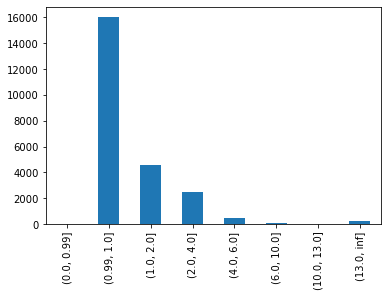

In [20]:
bins = [0, 0.99, 1, 2, 4, 6, 10, 13, float('Inf')]
data['NumberOfTime30-59DaysPastDueNotWorse_binned']= pd.cut(x = data['NumberOfTime30-59DaysPastDueNotWorse'],
                                                            bins = bins)

data['NumberOfTime30-59DaysPastDueNotWorse_binned'].value_counts(sort=False).plot.bar()
print(data['NumberOfTime30-59DaysPastDueNotWorse_binned'].value_counts())
print(bins)

We would like to see wether there can be any sort of relation among our bins and the target feature

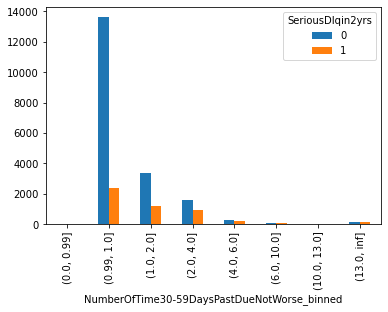

In [21]:
data.groupby(['NumberOfTime30-59DaysPastDueNotWorse_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What worries me about this feature?
- Extremely unbalanced, 130k+ records display a value of 0 (Again, kudos to the risk evaluation team)
- It does seem to suggest that the proportion of events on each bin increase is related to an increase in Delinquency events among the population.
- 96, 98 seem to be some sort of code. We need to create new features for these values.

### Debt Ratio
Monthly debt payments, alimony,living costs divided by monthy gross income. 

Potential pitfalls:
- Non accurate income measure
- Possible missing income measure (inf ratios)
- Debt Payments are mixed with living costs ( Non dynamic feature)

Theoretical ratio 0 - 2(?) lets check the portfolio distribution.

In [22]:
data['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

max of 339k? that's just denominator problems. Let us Find the bins for this variable

(0.367, 0.868]      37500
(0.175, 0.367]      37500
(-0.865, 0.175]     37500
(2.948, inf]        30457
(0.868, 1.908]       6189
(1.908, 2.948]        854
(-1.904, -0.865]        0
(-inf, -1.904]          0
Name: DebtRatio_binned, dtype: int64
[-inf, -1.9044659907499997, -0.8646960792499998, 0.17507383225, 0.366507841, 0.86825377325, 1.9080236847499998, 2.9477935962499995, inf]


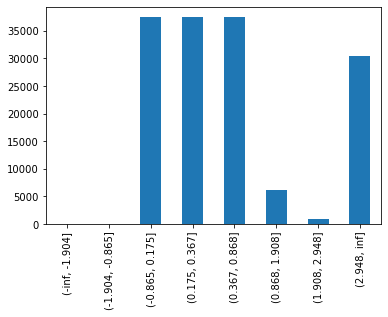

In [23]:
bins = BinSelection('DebtRatio')
# [float('-inf'), 0, 0.36, 0.86, 1, 2, 3, float('inf')])

data['DebtRatio_binned']= pd.cut(x = data['DebtRatio'],
                          bins = bins)

data['DebtRatio_binned'].value_counts(sort=False).plot.bar()
print(data['DebtRatio_binned'].value_counts())
print(bins)

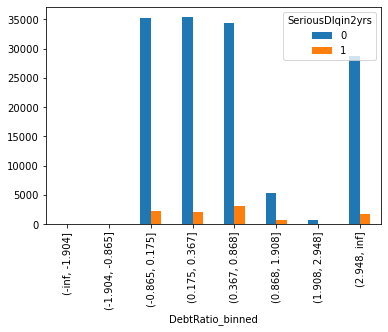

In [24]:
data.groupby(['DebtRatio_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What worries me about this feature? 
- Non informative feature, proportion of target does not seem to relate on a linear fashion among bins
- Construction problems. By dividing by an unreliable feature we have really high debt to income ratios that are driven mainly by Nan
- Feature treatment: bin, normalize, separate non informative by nulls

### MonthlyIncome       
Monthly income, no currency info, assumed USD. 
- No time period, Inflation should not play a role on 2y and US data.
- Income unless given and collected from employer it's a guess. Even then, dynamic nature of income brings a lot of variance to the data. 
- Assumed credit origination income to be maintained across credit lifecycle?

Potential pitfalls: 
- Tons of nulls
- Traditional unreliable data, be careful.

In [25]:
data['MonthlyIncome'].describe().apply("{:,.2f}".format)

count      120,269.00
mean         6,670.22
std         14,384.67
min              0.00
25%          3,400.00
50%          5,400.00
75%          8,249.00
max      3,008,750.00
Name: MonthlyIncome, dtype: object

Well that avg portfolio income does bring to tears all international students. But Let us focus on the task at hand.

We have:

- Around 30k Na's
- Some possible format problems? 3m monthly usd seems excessive. (Maybe Corporate Loans?)

Let's find the bins of this variable

In [26]:
bp_bins = (BinSelection('MonthlyIncome'))
bp_bins

[-inf, -11147.0, -3873.5, 3400.0, 5400.0, 8249.0, 15522.5, 22796.0, inf]

(3400.0, 5400.0]      30026
NaN                   29731
(0.0, 3400.0]         28655
(5400.0, 8000.0]      28503
(8000.0, 10000.0]     13132
(10000.0, 15000.0]    13035
(15000.0, 20000.0]     3181
(-inf, 0.0]            1634
(23000.0, inf]         1499
(20000.0, 23000.0]      604
Name: MonthlyIncome_binned, dtype: int64
[-inf, -11147.0, -3873.5, 3400.0, 5400.0, 8249.0, 15522.5, 22796.0, inf]


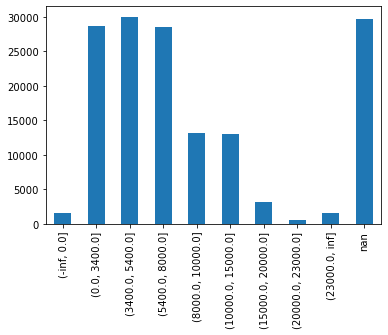

In [27]:
data['MonthlyIncome_binned']=pd.cut(x = data['MonthlyIncome'],
                        bins = [float('-Inf'), 0, 3400, 5400, 8000, 10000, 15000, 20000, 23000, float('Inf')] 
                        )
data['MonthlyIncome_binned'].value_counts(sort=False, dropna=False).plot.bar()
print(data['MonthlyIncome_binned'].value_counts(dropna= False))
print(bp_bins)

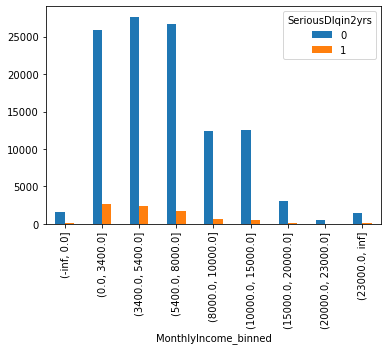

In [28]:
data.groupby(['MonthlyIncome_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What worries me about this feature:
- Absurd amount of nulls.
- Suspected outliers around 15k+ 
- Strong suspect of Outliers at 22k+

- Feature treatment:
    - Null treatment
    - Stze
    - Relate Nan values of debt ratio to median. in case of null income.
    

### NumberOfOpenCreditLinesAndLoans
Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).

- Proxy for income(?)

Potential pitfalls:
- Distorted by including Lines of credit (2-3 avg)
- Non Linear nature with target (?)

Let us delve into this feature.

In [29]:
data['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

Well even among industry standards this seems to involve also savings/checking accounts. A bit high to what was expected. Let us find the bins of this variable.

In [30]:
bp_bins = (BinSelection('NumberOfOpenCreditLinesAndLoans'))
bp_bins

[-inf, -13.0, -4.0, 5.0, 8.0, 11.0, 20.0, 29.0, inf]

(0.0, 5.0]      44702
(5.0, 8.0]      39421
(11.0, 20.0]    30709
(8.0, 11.0]     29300
(20.0, 29.0]     3538
(-inf, 0.0]      1888
(29.0, inf]       442
Name: NumberOfOpenCreditLinesAndLoans_binned, dtype: int64
[-inf, -13.0, -4.0, 5.0, 8.0, 11.0, 20.0, 29.0, inf]


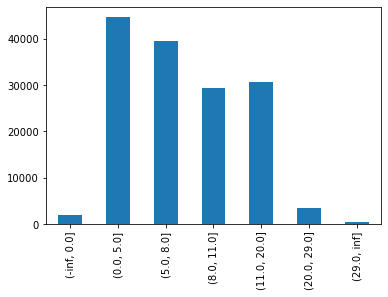

In [31]:
data['NumberOfOpenCreditLinesAndLoans_binned']=pd.cut(x = data['NumberOfOpenCreditLinesAndLoans'],
                        bins = [float('-inf'), 0, 5, 8, 11, 20, 29, float('inf')] 
                        )
data['NumberOfOpenCreditLinesAndLoans_binned'].value_counts(sort=False, dropna=False).plot.bar()
print(data['NumberOfOpenCreditLinesAndLoans_binned'].value_counts(dropna= False))
print(bp_bins)

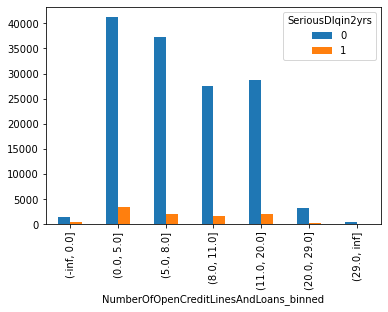

In [32]:
data.groupby(['NumberOfOpenCreditLinesAndLoans_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What worries me about this feature:
- More than 11 open lines? this is just way too much. Is this per household , even then?
- Non linear relationship with target. Low Open lines could men less income therefore more delinquency events?
- No null events. Possible aggregation across time errors. maybe card renewals?

Recommended treatment: 
- Separate feature space >11. 
- Treat >29 as outlier
- stdize.

### NumberOfTimes90DaysLate
Number of times borrower has been 90 days or more past due, this feature is considered a non-performing loan across different portfolio 3 months late payment is considered crossing a line in accounting literature. For House portfolios... maybe not that troublesome.

We will observe this feature with great interest.


In [33]:
data['NumberOfTimes90DaysLate'].describe()

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

Again this cheeky 98 trying to pass by, max theoretical of 24times. This reinforces our theory of code-related meaning on the feature, (maybe refinanced status?) 

In [34]:
data['NumberOfTimes90DaysLate'].value_counts(dropna=False)

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

(-inf, 0.0]    141662
(0.0, 1.0]       5243
(1.0, 2.0]       1555
(2.0, 3.0]        667
(3.0, 8.0]        561
(10.0, inf]       285
(8.0, 10.0]        27
Name: NumberOfTimes90DaysLate_binned, dtype: int64
[-inf, -13.0, -4.0, 5.0, 8.0, 11.0, 20.0, 29.0, inf]


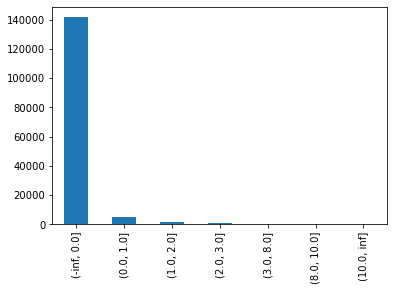

In [35]:
data['NumberOfTimes90DaysLate_binned']=pd.cut(x = data['NumberOfTimes90DaysLate'],
                        bins = [float('-inf'), 0, 1, 2, 3, 8, 10, float('inf')] 
                        )
data['NumberOfTimes90DaysLate_binned'].value_counts(sort=False, dropna=False).plot.bar()
print(data['NumberOfTimes90DaysLate_binned'].value_counts(dropna= False))
print(bp_bins)

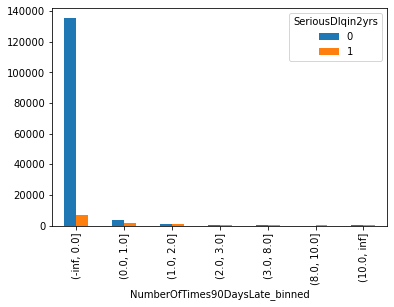

In [36]:
data.groupby(['NumberOfTimes90DaysLate_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What worries me about this feature?: 
- Unbalanced feature
- Highly informative > 1.
- Leakage? three times of >90 events could be considered serious delinquency events.

Treatment:
- Encode

### NumberRealEstateLoansOrLines
Number of mortgage and real estate loans including home equity lines of credit.

In [37]:
data['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

Now this **is** some real feature, its range is among what is expected. 1 maybe 2 mortgages. You would expect delinquencies on these to be low. Nonetheless... this was 9 years ago we should be careful at assigning any expected value to our beliefs about this feature.


In [38]:
data['NumberRealEstateLoansOrLines'].value_counts(dropna= False)

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [39]:
bp_bins = (BinSelection('NumberRealEstateLoansOrLines'))
bp_bins

[-inf, -6.0, -3.0, 0.0, 1.0, 2.0, 5.0, 8.0, inf]

(-3.0, 0.0]     56188
(0.0, 1.0]      52338
(1.0, 2.0]      31522
(2.0, 5.0]       9159
(5.0, 8.0]        584
(8.0, inf]        209
(-6.0, -3.0]        0
(-inf, -6.0]        0
Name: NumberRealEstateLoansOrLines_binned, dtype: int64
[-inf, -6.0, -3.0, 0.0, 1.0, 2.0, 5.0, 8.0, inf]


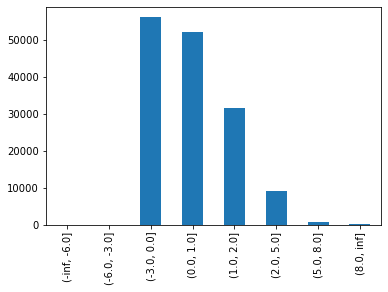

In [42]:
data['NumberRealEstateLoansOrLines_binned']=pd.cut(x = data['NumberRealEstateLoansOrLines'],
                        bins = bp_bins
                        )
data['NumberRealEstateLoansOrLines_binned'].value_counts(sort=False, dropna=False).plot.bar()
print(data['NumberRealEstateLoansOrLines_binned'].value_counts(dropna= False))
print(bp_bins)

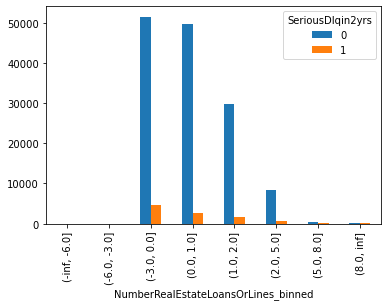

In [43]:
data.groupby(['NumberRealEstateLoansOrLines_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar()

What worries me about this feature?
- That everything seems normal. What am I missing?

### NumberOfTime60-89DaysPastDueNotWorse
Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

In [ ]:
data['NumberOfTime60-89DaysPastDueNotWorse'].describe()

In [ ]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(dropna=False)

In [ ]:
# Bin Selection
bp_bins = (BinSelection('NumberOfTime60-89DaysPastDueNotWorse'))
bp_bins

In [ ]:
data['NumberOfTime60-89DaysPastDueNotWorse_binned']=pd.cut(x = data['NumberOfTime60-89DaysPastDueNotWorse'],
                        bins = [float('-inf'), 0, 1, 2, 3, float('inf')] 
                        )
data['NumberOfTime60-89DaysPastDueNotWorse_binned'].value_counts(sort=False, dropna=False).plot.bar()
print(data['NumberOfTime60-89DaysPastDueNotWorse_binned'].value_counts(dropna= False))
print(bp_bins)

In [ ]:
data.groupby(['NumberOfTime60-89DaysPastDueNotWorse_binned',"SeriousDlqin2yrs"]).size().unstack().plot.bar(figsize=(8, 6))

What worries me about this feature?: 
- Unbalanced feature
- Highly informative > 1.
- Leakage? three times of >90 events could be considered serious delinquency events.

Treatment:
- Encode

### Calculate Pearson Correlation


In [ ]:
# Displays last column of Pearson correaltion matrix as a Pandas DataFrame
pd.DataFrame(data.corr()['SeriousDlqin2yrs']).iloc[:-1]

This is why we perform our correlation analysis **after** taking a closer look to the dataset. We know that there are instances which revolving utilization will help out distinguish delinquency events.

## EDA Recap or better: What worries me about my features?
- **RevolvingUtilizationOfUnsecuredLines**
    - Negative numbers on utilization are not feasible (Solved)
    - Numbers greater than 1 seem troublesome from a financial point perspective. (Associated with target)
    - High Utilization of revolving products does suggest an increase on the target feature
- **Age**
    - People Below legal age (Only 1 case)
    - 90+ population (Cap at 90)
    - Relationship follows literature on agent financial life cycle
- **NumberOfTime30-59DaysPastDueNotWorse**
    - Extremely unbalanced, 130k+ records display a value of 0 (Again, kudos to the risk evaluation team)
    - It does seem to suggest that the proportion of events on each bin increase is related to an increase in Delinquency events among the population.
    - 96, 98 seem to be some sort of code. We need to create new features for these values.
- **DebtRatio** 
    - Non informative feature, proportion of target does not seem to relate on a linear fashion among bins
    - Construction problems. By dividing by an unreliable feature we have really high debt to income ratios that are driven mainly by Nan
    - Feature treatment: bin, normalize, separate non informative by nulls
- **MonthlyIncome**
    - Absurd amount of nulls.
    - Suspected outliers around 15k+ 
    - Strong suspect of Outliers at 22k+
    - Feature treatment:
        - Null treatment
        - Stze
        - Relate Nan values of debt ratio to median. in case of null income.
- **NumberOfOpenCreditLinesAndLoans**
    - More than 11 open lines? this is just way too much. Is this per household , even then?
    - Non linear relationship with target. Low Open lines could men less income therefore more delinquency events?
    - No null events. Possible aggregation across time errors. maybe card renewals?
    - Feature treatment: 
        - Separate feature space >11. 
        - Treat >29 as outlier
        - stdize.
- **NumberOfTimes90DaysLate** 
    - Unbalanced feature
    - Highly informative > 1.
    - Leakage? three times of >90 events could be considered serious delinquency events.
    - Treatment:
        - Encode
- **NumberRealEstateLoansOrLines**
    - Everything seems normal. What am I missing?
- **NumberOfTime60-89DaysPastDueNotWorse**
    - Unbalanced feature
    - Highly informative > 1.
    - Treatment:
        - Encode